# KINETICS 400

# Загрузка датасета

In [3]:
import gdown
import os
import pandas as pd
import seaborn as sns 

In [4]:
gdown.download_folder(id="1fagXoc1PQB1AGNOq7ZnMqOa_YjtaLx0-")

Retrieving folder contents


Processing file 135ZsdY59DTq6SK6R76QBYskJY_BqiSp_ archery.mp4
Processing file 1yuldqE1bkT-J9XlEx_qGoROwYbYiOJix head.csv
Processing file 1xjsK8TVD0dV0JvK8UYkodjaVflHEOssM kinetics_400_categroies.txt
Processing file 1jEkaKEJkiMbmHawG1Gz4FVQl4CkygRhj kinetics_classnames.json
Processing file 18c9aYPjeIqkJdzoH-QYF9eUehe5QxzLg test.csv
Processing file 1KFpaDhzeDcNJ8yilRN-T693QqJq4Ap5- train.csv
Processing file 17rMbxNiTsyJocgpUnkOxJAzNNv0NKU1K val.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=135ZsdY59DTq6SK6R76QBYskJY_BqiSp_
To: /home/zephav/fkii/courseproject/kinetics/archery.mp4
100%|██████████| 549k/549k [00:03<00:00, 153kB/s]
Downloading...
From: https://drive.google.com/uc?id=1yuldqE1bkT-J9XlEx_qGoROwYbYiOJix
To: /home/zephav/fkii/courseproject/kinetics/head.csv
100%|██████████| 22.0/22.0 [00:00<00:00, 940B/s]
Downloading...
From: https://drive.google.com/uc?id=1xjsK8TVD0dV0JvK8UYkodjaVflHEOssM
To: /home/zephav/fkii/courseproject/kinetics/kinetics_400_categroies.txt
100%|██████████| 7.45k/7.45k [00:00<00:00, 200kB/s]
Downloading...
From: https://drive.google.com/uc?id=1jEkaKEJkiMbmHawG1Gz4FVQl4CkygRhj
To: /home/zephav/fkii/courseproject/kinetics/kinetics_classnames.json
100%|██████████| 11.1k/11.1k [00:00<00:00, 132kB/s]
Downloading...
From: https://drive.google.com/uc?id=18c9aYPjeIqkJdzoH-QYF9eUehe5QxzLg
To: /hom

['/home/zephav/fkii/courseproject/kinetics/archery.mp4',
 '/home/zephav/fkii/courseproject/kinetics/head.csv',
 '/home/zephav/fkii/courseproject/kinetics/kinetics_400_categroies.txt',
 '/home/zephav/fkii/courseproject/kinetics/kinetics_classnames.json',
 '/home/zephav/fkii/courseproject/kinetics/test.csv',
 '/home/zephav/fkii/courseproject/kinetics/train.csv',
 '/home/zephav/fkii/courseproject/kinetics/val.csv']

In [5]:
import csv

file0 = "kinetics/head.csv"
file1 = "kinetics/test.csv"
file2 = "kinetics/train.csv"
file3 = "kinetics/val.csv"

file_list = [file0, file1, file2, file3]
output_file = "combined_file.csv"

# Объединение файлов
with open(output_file, mode='a', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    header_written = False 

    for file in file_list:
        with open(file, mode='r', newline='', encoding='utf-8') as infile:
            reader = csv.reader(infile)
            header = next(reader)  

            if not header_written:
                writer.writerow(header)
                header_written = True      
            for row in reader:
                writer.writerow(row)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [6]:
df = pd.read_csv("combined_file.csv")
df = df.drop(df.columns[2], axis=1)

In [7]:
txt_file = "./kinetics/kinetics_400_categroies.txt"
txt_dict = {}

# Чтение текстового файла и создание словаря
with open(txt_file, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split('\t')  # Разделяем по табуляции
        txt_dict[int(parts[1])] = parts[0]  # Сохраняем как {число: класс}
df['class'] = df['class_id'].map(txt_dict)
df.to_csv("final_data.csv", index=False)
os.remove("combined_file.csv")

# Обзор датасета

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280007 entries, 0 to 280006
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   video_id  280007 non-null  object
 1   class_id  280007 non-null  int64 
 2   class     280007 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.4+ MB


In [10]:
df.tail()

,video_id,class_id,class
280002,PyGsYFhOwsA.mp4,331,zumba
280003,PY_aNRmCnzw.mp4,331,zumba
280004,QcXdaGEK9yU.mp4,331,zumba
280005,r5CiCcQ6T_w.mp4,331,zumba
280006,RZeatwX9l0o.mp4,331,zumba


In [11]:
df["class_id"].value_counts()

class_id
17     1090
58     1090
149    1090
124    1090
266    1088
       ... 
193     341
56      341
228     333
288     333
161     322
Name: count, Length: 400, dtype: int64

Дисбаланс классов:

In [13]:
print(" Наибольший разброс в количестве элементов классов: ", df["class_id"].value_counts().max() - df["class_id"].value_counts().min())

 Наибольший разброс в количестве элементов классов:  768


In [14]:
df[df['class_id'] == 341]

,video_id,class_id,class
0,3caPS4FHFF8.mp4,341,abseiling
1,3yaoNwz99xM.mp4,341,abseiling
2,6IbvOJxXnOo.mp4,341,abseiling
3,6_4kjPiQr7w.mp4,341,abseiling
4,9EnSwbXxu5g.mp4,341,abseiling
...,...,...,...
260265,yq_M1PMw2hY.mp4,341,abseiling
260266,z9vSfUWX4pI.mp4,341,abseiling
260267,Zv09PB3YQAs.mp4,341,abseiling
260268,_aQSjArgAqA.mp4,341,abseiling


# Статистика

In [16]:
import matplotlib.pyplot as plt 

In [17]:
gdown.download(id="1e1J3XtLfh1A85Egr8f-YXjR53Lrw4Yce", output="Life Expectancy Data.csv")

Downloading...
From: https://drive.google.com/uc?id=1e1J3XtLfh1A85Egr8f-YXjR53Lrw4Yce
To: /home/zephav/fkii/courseproject/Life Expectancy Data.csv
100%|██████████| 333k/333k [00:01<00:00, 186kB/s]


'Life Expectancy Data.csv'

In [18]:
data=pd.read_csv("Life Expectancy Data.csv")
df = data.copy()

In [19]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [21]:
# Подсчет пропущенных значений по каждому столбцу
missing_values = df.isnull().sum()
missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Заполнение пропущенных значений

In [23]:
str_cols = df.select_dtypes(include=['object'])
str_cols_missing = str_cols.columns[str_cols.isnull().any()]

str_cols_missing

Index([], dtype='object')

In [24]:
num_cols = df.select_dtypes(include=['number'])
num_cols_missing = num_cols.columns[num_cols.isnull().any()]

num_cols_missing

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [25]:
df[num_cols_missing]

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,0.01,65.0,19.1,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,0.01,62.0,18.6,58.0,8.18,62.0,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,0.01,64.0,18.1,62.0,8.13,64.0,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,0.01,67.0,17.6,67.0,8.52,67.0,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,0.01,68.0,17.2,68.0,7.87,68.0,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,4.36,68.0,27.1,67.0,7.13,65.0,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,4.06,7.0,26.7,7.0,6.52,68.0,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,4.43,73.0,26.3,73.0,6.53,71.0,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,1.72,76.0,25.9,76.0,6.16,75.0,548.587312,12366165.0,1.6,1.7,0.427,9.8


Пропуски только в колонках с численным типом данных

In [27]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

df[num_cols_missing] = knn_imputer.fit_transform(df[num_cols_missing])

In [28]:
missing_values = df.isnull().sum()
missing_values

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Проверка выбросов

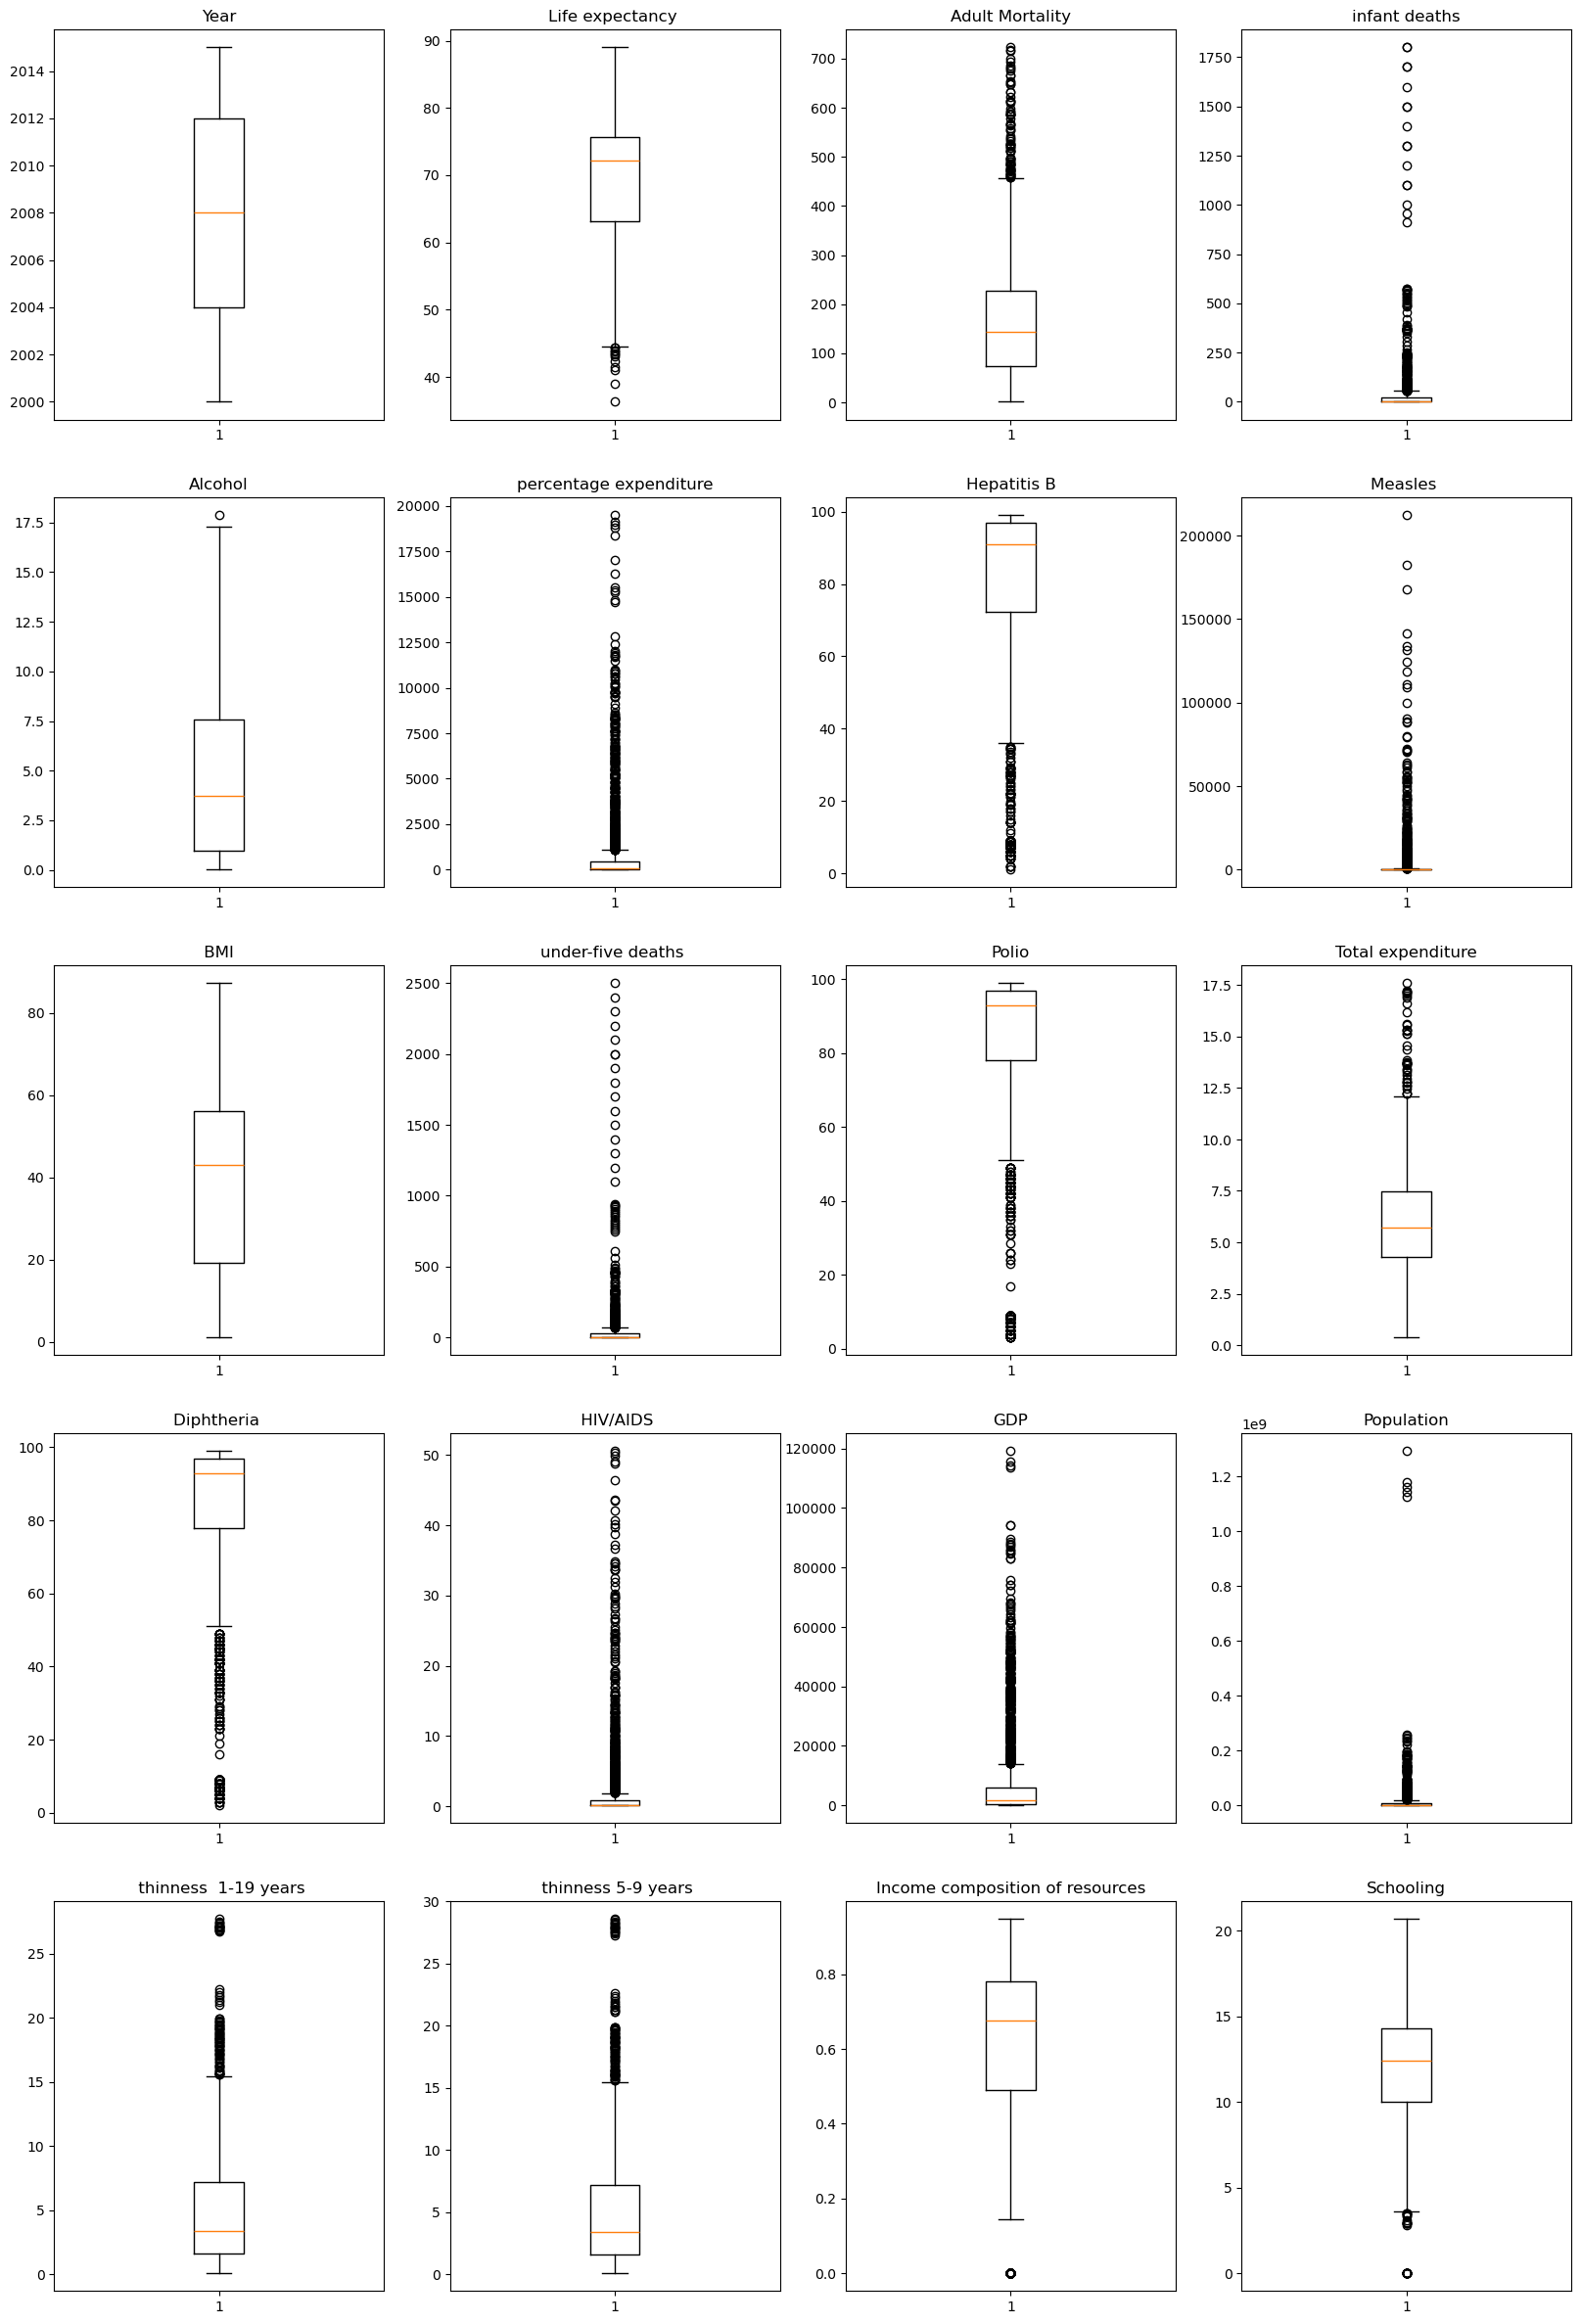

In [30]:
plt.figure(figsize=(20,30))
i=1
for col in df.select_dtypes(include='number'):
    plt.subplot(5,4,i)
    plt.boxplot(df[col],whis=1.5)
    plt.title(col)
    i+=1

plt.show()

Можно сделать вывод, что выбросы являются частым явлением, и, соответстенно, избавляться от них не стоит.

## Стандартизация

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Понижение размерности 

### Оработка категориальных данных

Для начала потребуется избавиться от категориальных данных, т.к. PCA разработан для числовых признаков  

In [37]:
for col in  df.select_dtypes(include=['object']).columns:
    df=df.drop(columns = [col])

df.select_dtypes(include=['object']).columns

Index([], dtype='object')

### PCA

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

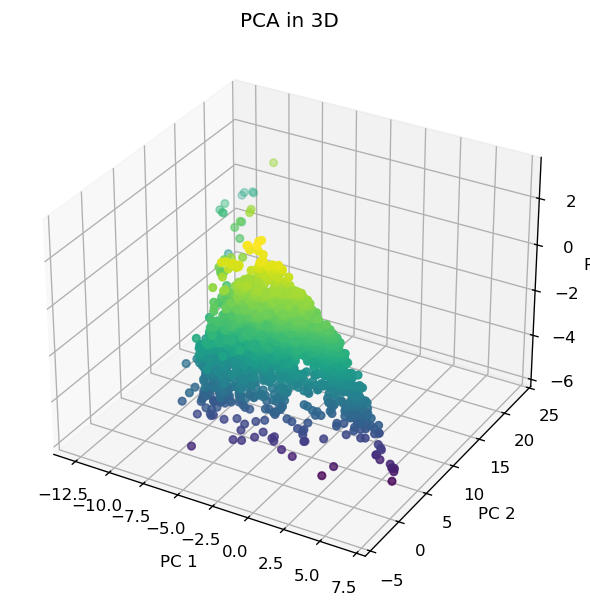

In [41]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_result[:, 2], cmap='viridis')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA in 3D')

plt.show()

## Кластеризация

### Метод k ближайших соседей

In [44]:
from sklearn.cluster import KMeans

In [45]:
X = pca_result

In [46]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

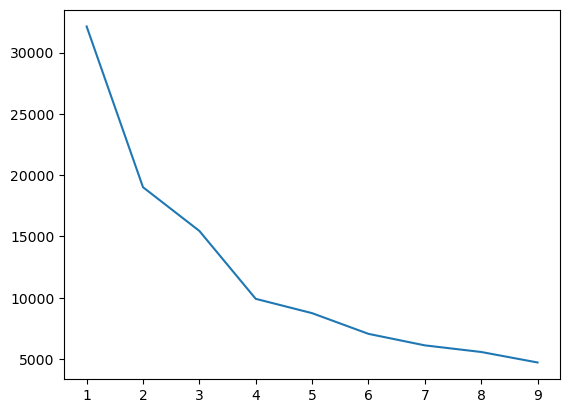

In [47]:
plt.plot(range(1,10),wcss)
plt.show()

In [48]:
X = df.copy()
kmeans = KMeans(n_clusters=6, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=6)

Из графика выше следует, что 6 - оптимальное количество соседей.

In [50]:
df_seg_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_result)], axis=1)
df_seg_pca_kmeans.columns.values[-3:] = ['PC1', 'PC2', 'PC3']
df_seg_pca_kmeans['K-Means-Segment'] = kmeans.labels_

In [51]:
df_seg_pca_kmeans.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,PC1,PC2,PC3,K-Means-Segment
0,1.621762,-0.444204,0.791204,0.268824,-1.144613,-0.335570,-0.598025,-0.110384,-0.956758,0.255359,...,-0.482662,0.403072,2.799587,2.760746,-0.703764,-0.559035,-3.778073,0.464168,-0.040297,2
1,1.404986,-0.980244,0.855631,0.285786,-1.144613,-0.334441,-0.718906,-0.168124,-0.981763,0.274060,...,-0.480581,-0.212163,2.867625,2.805230,-0.718011,-0.588677,-3.554008,0.274403,0.734231,0
2,1.188210,-0.980244,0.831471,0.302749,-1.144613,-0.334594,-0.638319,-0.173531,-1.006768,0.292761,...,-0.479188,0.366153,2.912983,2.849714,-0.746505,-0.618319,-3.600955,0.537039,0.873207,0
3,0.971434,-1.022287,0.863684,0.328193,-1.144613,-0.332096,-0.517437,0.032045,-1.031773,0.317696,...,-0.476393,-0.150115,2.958342,2.916439,-0.779747,-0.647961,-3.566918,0.432395,1.026544,0
4,0.754658,-1.053819,0.887844,0.345155,-1.144613,-0.367862,-0.477143,0.051757,-1.051777,0.342631,...,-0.520752,-0.163344,3.026380,2.960923,-0.822488,-0.736886,-3.716002,0.428303,1.122383,0


In [52]:
df_seg_pca_kmeans['Segment'] = df_seg_pca_kmeans['K-Means-Segment'].map({
    0:'first',
    1:'second',
    2:'third',
    3:'fourth',
    4:'fifth',
    5:'sixth',
})

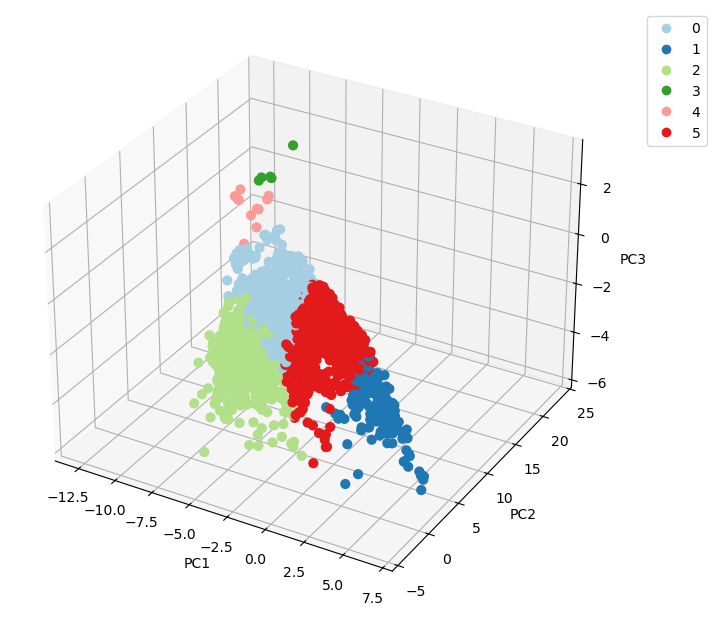

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
x = df_seg_pca_kmeans['PC1']
y = df_seg_pca_kmeans['PC2']
z = df_seg_pca_kmeans['PC3']

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("Paired", 6).as_hex())

sc = ax.scatter(x, y, z, s=40, c=df_seg_pca_kmeans['K-Means-Segment'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# Запуск модели slowfast

![Описание изображения](./sfast.png)

In [56]:
import torch
import json
from torchvision.transforms import Compose, Lambda
from torchvision.transforms._transforms_video import (
    CenterCropVideo,
    NormalizeVideo,
)
from pytorchvideo.data.encoded_video import EncodedVideo
from pytorchvideo.transforms import (
    ApplyTransformToKey,
    ShortSideScale,
    UniformTemporalSubsample,
    UniformCropVideo
)
from typing import Dict

/home/zephav/anaconda3/lib/python3.12/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/zephav/anaconda3/lib/python3.12/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


In [57]:
device = "cpu"

model_name = "slowfast_r50"
model = torch.hub.load("facebookresearch/pytorchvideo", model=model_name, pretrained=True)

model = model.to(device)
model = model.eval()

Using cache found in /home/zephav/.cache/torch/hub/facebookresearch_pytorchvideo_main


In [58]:
with open("kinetics/kinetics_classnames.json", "r") as f:
    kinetics_classnames = json.load(f)

kinetics_id_to_classname = {}
for k, v in kinetics_classnames.items():
    kinetics_id_to_classname[v] = str(k).replace('"', "")

In [59]:
side_size = 256
mean = [0.45, 0.45, 0.45]
std = [0.225, 0.225, 0.225]
crop_size = 256
num_frames = 32
sampling_rate = 2
frames_per_second = 30
alpha = 4

class PackPathway(torch.nn.Module):
    """
    Transform for converting video frames as a list of tensors.
    """
    def __init__(self):
        super().__init__()

    def forward(self, frames: torch.Tensor):
        fast_pathway = frames
        slow_pathway = torch.index_select(
            frames,
            1,
            torch.linspace(
                0, frames.shape[1] - 1, frames.shape[1] // alpha
            ).long(),
        )
        frame_list = [slow_pathway, fast_pathway]
        return frame_list

transform =  ApplyTransformToKey(
    key="video",
    transform=Compose(
        [
            UniformTemporalSubsample(num_frames),
            Lambda(lambda x: x/255.0),
            NormalizeVideo(mean, std),
            ShortSideScale(
                size=side_size
            ),
            CenterCropVideo(crop_size),
            PackPathway()
        ]
    ),
)

clip_duration = (num_frames * sampling_rate)/frames_per_second

In [60]:
video_path = "kinetics/archery.mp4"

start_sec = 0
end_sec = start_sec + clip_duration

video = EncodedVideo.from_path(video_path)

video_data = video.get_clip(start_sec=start_sec, end_sec=end_sec)

video_data = transform(video_data)

inputs = video_data["video"]
inputs = [i.to(device)[None, ...] for i in inputs]


In [61]:
preds = model(inputs)

In [62]:
post_act = torch.nn.Softmax(dim=1)
preds = post_act(preds)
pred_classes = preds.topk(k=5).indices

pred_class_names = [kinetics_id_to_classname[int(i)] for i in pred_classes[0]]
print("Predicted labels: %s" % ", ".join(pred_class_names))

Predicted labels: archery, throwing axe, playing paintball, disc golfing, riding or walking with horse


# ML Systems

Данный датасет может быть использован в: 
1) Сфере безопасности: обнаружение вандализма, опасных ситуаций, подзрительных действий;
2) Сфере спорта: классификация движений спорстсменов, определение важных моментов матчка;
3) Потенциально в сфере автопилотов для определени действий водетилей;
4) В сфере наблюдения за животными, сбора информации об их действиях;

Т.к. использовалась наименьшая из доступных версий датасета (400 классов), то и сферы применения обученных на датасете моделей довольно ограничены, 
но существуют и другие версии, на 600 и 700, позволяющие расширить сферу применения.